In [56]:
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns



size_gen = 300
m=1
b=2


sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

def generar_listado_a(sizes):
    return list(npy.random.randint(low = 1,high=sizes,size=sizes))

def generar_listado_b(sizes):
    #return list(npy.random.poisson(800, size_gen))
    return npy.random.normal(sizes, sizes*0.8, size=(sizes))

def generar_listado_c(sizes):
    return list(npy.random.poisson(sizes, sizes))


def generar_listado_y_hat(data_z):
    data_ex=[]
    for n in data_z:     
        data_ex.append(n*m+b)              
    return data_ex
     
def generar_listado_error(data_t,data_r):
    error=[]
    for n in range(data_t.size):  
        error.append(((data_r[n]-data_t[n])**2)/2)            
    return error


def generar_listado_gradiente_m(data_x,data_w,data_q):
    gradiente_xc=[]
    for n in range(data_x.size):         
        gradiente_xc.append((data_q[n]-data_w[n])*data_x[n])            
    return gradiente_xc

def generar_listado_gradiente_b(data_f,data_g):
    gradiente_xz=[]
    for n in range(data_f.size):         
        gradiente_xz.append((data_g[n]-data_f[n]))            
    return gradiente_xz     

def graficar_univariable(function):
    import matplotlib.pyplot as plt_t

    plt_t.plot([1, 2, 3, 4,5, 6, 7, 8, 9, 10],function)    
    plt_t.show() 
    
def graficar_univariable_doble(function_B,function_A):
    import matplotlib.pyplot as plt_t
    plt_t.plot(function_B) 
    plt_t.plot(function_A)    
    plt_t.show()     
    
def genera_listado():
    #cada rango tiene 6 celdas se multiplica por 6 la cantidad 7008 es el 80% del total
    cantidad = 7008
    function_A=[]  
    data_b=[]
    data_b=npy.load('proyecto_training_data.npy')
    
    data_b=data_b[:cantidad].flatten();
    data_b = npy.array([x for x in data_b if npy.isnan(x) == False])

    
    npy.save('A', npy.array(generar_listado_a(data_b.size)))
    #npy.save('B', npy.array(generar_listado_b()))
   
 
    data_a=npy.load('A.npy')
    

    #print(data_b)

    sns.scatterplot(data_a, data_b)

    data_y=generar_listado_y_hat(data_a)

    

    error_promedio = npy.mean(generar_listado_error(data_b,data_y))
    print('Error_promedio_A:',error_promedio)  
    
    gradiente_m = generar_listado_gradiente_m(data_a,data_b,data_y)
    gradiente_b = generar_listado_gradiente_b(data_b,data_y)

    
    gb_prom=npy.mean(gradiente_b)
    gm_prom=npy.mean(gradiente_m)


    for x in range(10): 
        x*gm_prom+gb_prom
        function_A.append(x*gm_prom+gb_prom)
        
    import matplotlib.pyplot as plt_t
    print('Resultado x*m+b : ')
    print(function_A)


    return(function_A)

def operar_listado_doble():
  cantidad = 7008
  A_function=[]  
  function_B=[] 

  data_b=npy.load('proyecto_training_data.npy')
  
  
  data_d=npy.load('proyecto_training_data.npy')

  data_b=data_b[:cantidad].flatten();
  data_d=data_d[:cantidad].flatten();
  
  data_b = npy.array([x for x in data_b if npy.isnan(x) == False])
  data_d = npy.array([x for x in data_d if npy.isnan(x) == False])
  
  print(data_b.size)
  
  npy.save('A', npy.array(generar_listado_a(data_d.size)))
  
  npy.save('C', npy.array(generar_listado_a(data_d.size)))
  
  data_a=npy.load('A.npy')
  data_c=npy.load('C.npy')

  sns.scatterplot(data_a,data_b)
  sns.scatterplot(data_c,data_d)
  
  
  data_y=generar_listado_y_hat(data_a)
  data_y_c=generar_listado_y_hat(data_c)
  
  generar_listado_error(data_b,data_y) 
  generar_listado_error(data_d,data_y_c) 
 
    
  error_promedio_a = npy.mean(generar_listado_error(data_b,data_y)) 
  error_promedio_b = npy.mean(generar_listado_error(data_d,data_y_c)) 
    
  print('Error_promedio_A:',error_promedio_a)  
  print('Error_promedio_B:',error_promedio_b)  
  
  gradiente_m = generar_listado_gradiente_m(data_a,data_b,data_y)
  gradiente_b = generar_listado_gradiente_b(data_b,data_y)
  
  
  gradiente_mi = generar_listado_gradiente_m(data_c,data_d,data_y_c)
  gradiente_bi = generar_listado_gradiente_b(data_d,data_y_c)
  
  
  gb_prom=npy.mean(gradiente_b)
  gm_prom=npy.mean(gradiente_m)
  
  gb_prom_c=npy.mean(gradiente_bi)
  gm_prom_c=npy.mean(gradiente_mi)

  for x in range(10): 
      A_function.append(x*gm_prom+gb_prom)
  print('---------------------------')    
  for x in range(10): 
      function_B.append(x*gm_prom_c+gb_prom_c)      
      
  from sklearn.metrics import mean_absolute_percentage_error   
  from sklearn.metrics import hamming_loss


    
  #plt.plot(function)  
  print('A) resultado de xm+b:')
  print(A_function)
  print('B) resultado de xm+b:')
  print(function_B)
  print('Media de error:')
  print(mean_absolute_percentage_error(A_function, function_B))
  #print('perdida:')
  #print(hamming_loss(A_function, function_B))
 


  
  return mean_absolute_percentage_error(A_function, function_B)

Error_promedio_A: 3232840647.8514295
Resultado x*m+b : 
[-27375.446888601342, -107970199.3623103, -215913023.277732, -323855847.19315374, -431798671.10857546, -539741495.0239971, -647684318.9394188, -755627142.8548405, -863569966.7702622, -971512790.685684]


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[-27375.446888601342,
 -107970199.3623103,
 -215913023.277732,
 -323855847.19315374,
 -431798671.10857546,
 -539741495.0239971,
 -647684318.9394188,
 -755627142.8548405,
 -863569966.7702622,
 -971512790.685684]

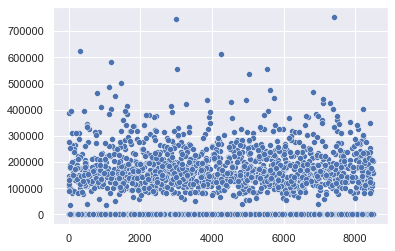

In [46]:
genera_listado() # con el 80% ya que es real

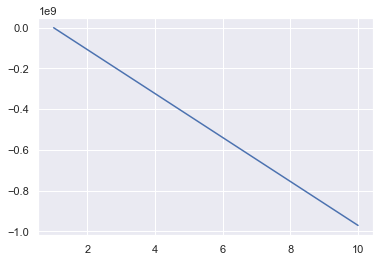

In [47]:
graficar_univariable([-27375.446888601342,
 -107970199.3623103,
 -215913023.277732,
 -323855847.19315374,
 -431798671.10857546,
 -539741495.0239971,
 -647684318.9394188,
 -755627142.8548405,
 -863569966.7702622,
 -971512790.685684])

8501
Error_promedio_A: 3228520123.5979886
Error_promedio_B: 3227190640.377426
---------------------------
A) resultado de xm+b:
[-27340.675802846723, -112129174.78320198, -224231008.89060113, -336332842.99800026, -448434677.10539937, -560536511.2127985, -672638345.3201977, -784740179.4275968, -896842013.5349959, -1008943847.642395]
B) resultado de xm+b:
[-27358.713680743444, -113549885.40124692, -227072412.0888131, -340594938.7763793, -454117465.46394545, -567639992.1515117, -681162518.8390778, -794685045.526644, -908207572.2142102, -1021730098.9017763]
Media de error:
0.011471054771826378


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.011471054771826378

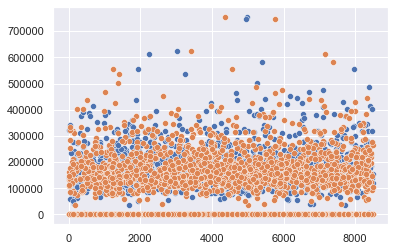

In [50]:
operar_listado_doble() #con el 20%

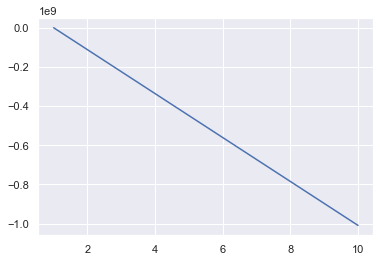

In [51]:
#GRAFICAR A
graficar_univariable([-27340.675802846723, -112129174.78320198, -224231008.89060113, -336332842.99800026, -448434677.10539937, -560536511.2127985, -672638345.3201977, -784740179.4275968, -896842013.5349959, -1008943847.642395])

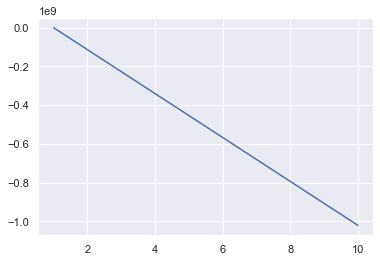

In [52]:
#GRAFICAR B
graficar_univariable([-27358.713680743444, -113549885.40124692, -227072412.0888131, -340594938.7763793, -454117465.46394545, -567639992.1515117, -681162518.8390778, -794685045.526644, -908207572.2142102, -1021730098.9017763])

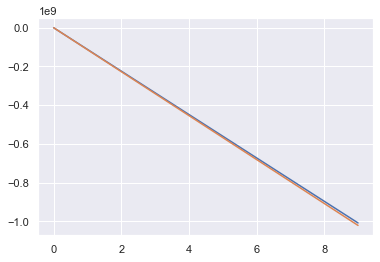

In [53]:
graficar_univariable_doble([-27340.675802846723, -112129174.78320198, -224231008.89060113, -336332842.99800026, -448434677.10539937, -560536511.2127985, -672638345.3201977, -784740179.4275968, -896842013.5349959, -1008943847.642395],
 [-27358.713680743444, -113549885.40124692, -227072412.0888131, -340594938.7763793, -454117465.46394545, -567639992.1515117, -681162518.8390778, -794685045.526644, -908207572.2142102, -1021730098.9017763])                          

Error_promedio_A: 3231734314.35884
Resultado x*m+b : 
[-27362.07869662393, -108966098.97070932, -217904835.86272204, -326843572.7547347, -435782309.6467474, -544721046.5387601, -653659783.4307728, -762598520.3227855, -871537257.2147982, -980475994.1068109]


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[-27362.07869662393,
 -108966098.97070932,
 -217904835.86272204,
 -326843572.7547347,
 -435782309.6467474,
 -544721046.5387601,
 -653659783.4307728,
 -762598520.3227855,
 -871537257.2147982,
 -980475994.1068109]

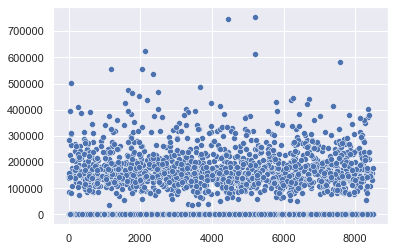

In [57]:
genera_listado() # con el 80% ya que es real

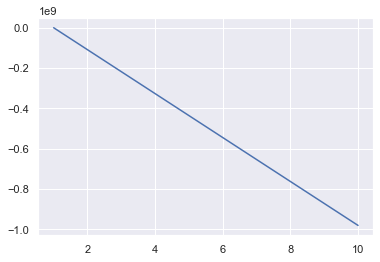

In [58]:
#GRAFICAR A
graficar_univariable([-27362.07869662393, -108966098.97070932, -217904835.86272204, -326843572.7547347, -435782309.6467474, -544721046.5387601, -653659783.4307728, -762598520.3227855, -871537257.2147982, -980475994.1068109])

8501
Error_promedio_A: 3230628345.9717093
Error_promedio_B: 3233332514.336431
---------------------------
A) resultado de xm+b:
[-27401.83190212916, -110265073.24914716, -220502744.66639218, -330740416.08363724, -440978087.50088227, -551215758.9181273, -661453430.3353723, -771691101.7526174, -881928773.1698624, -992166444.5871074]
B) resultado de xm+b:
[-27415.45018233149, -107652236.83578403, -215277058.22138572, -322901879.6069874, -430526700.9925891, -538151522.3781909, -645776343.7637925, -753401165.1493942, -861025986.5349959, -968650807.9205977]
Media de error:
0.021379770409387315


C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rogue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.021379770409387315

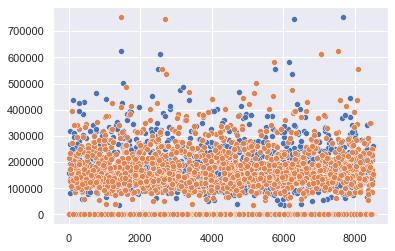

In [59]:
operar_listado_doble() #con el 80%

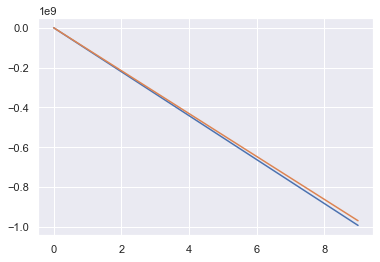

In [60]:
graficar_univariable_doble([-27401.83190212916, -110265073.24914716, -220502744.66639218, -330740416.08363724, -440978087.50088227, -551215758.9181273, -661453430.3353723, -771691101.7526174, -881928773.1698624, -992166444.5871074],
[-27415.45018233149, -107652236.83578403, -215277058.22138572, -322901879.6069874, -430526700.9925891, -538151522.3781909, -645776343.7637925, -753401165.1493942, -861025986.5349959, -968650807.9205977])                          